In [2]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

y = b + wx + e

y = label
b = bias (intercept)
w = weight (slope)
x = feature
e = noise (epsilon)

Lets make a synthetic data generation (pseudorandom)

In [3]:
true_b = 1
true_w = 2
N = 100

#Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = (.1 * np.random.randn(N, 1))
y = true_b + (true_w * x) + epsilon


np.random.seed(42) generates the same 'random' set of values every time run

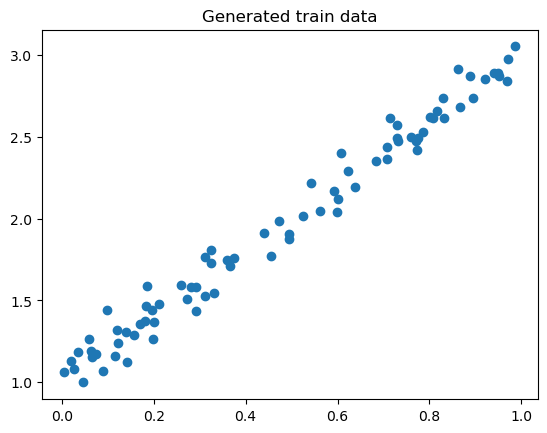

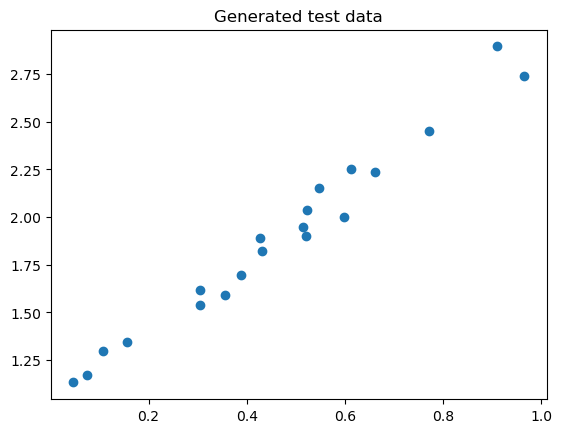

In [4]:
#shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

#uses the first 80 random indices for training
train_idx = idx[:int(N*.8)]

#uses the remaining indices as validation/test
val_idx = idx[int(N*.8):]


#gernerates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.title("Generated train data")
plt.scatter(x_train, y_train)
plt.show()

plt.title("Generated test data")
plt.scatter(x_val, y_val)
plt.show()

Random initialisation

In [5]:
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


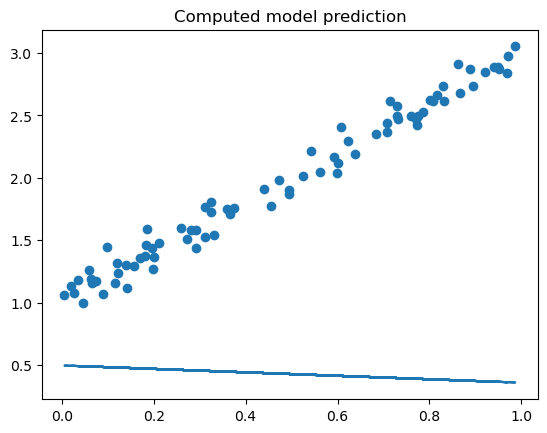

In [6]:
yhat = b + (w * x_train)

plt.title("Computed model prediction")
plt.scatter(x_train, y_train)

plt.plot(x_train, yhat)
plt.show()




### Next we need to compute the loss

difference between loss and error

Error  is the difference between the actual value (label) and the predicted value for a single data point  (error(i) = yhat(i) - y(i))

The loss however is the aggregation of errors for a set of data points. 

The loss give a more stable path from the initial random parameers to the parameters that minimize loss, but is slow so usually we compute only a set n from the whole prediction N for the sack of speed.

#### Batch, Mini-batch and stochastic Gradient Descent

If we use all points in the training set (n = N) to compute loss, we are performing a batch gradient descent

If we use a single point (n = 1) each time, it would be a stochastic gradient descent

Anything else (n) in between 1 and N characterizes a mini-batch gradient descent



For Regression problem, loss is given by the mean squared error (MSE), average of all squared errors; This is average of all squared differences between labels(y) and predictions(b + wx)

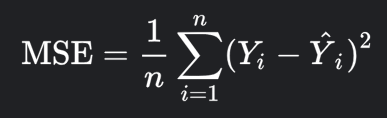

In code below, we are using all data points of the training set to compute the loss, so n = N = 80, meaning we are indeed performing batch gradient descent.

In [7]:
#Computing the loss

#using all data points, so this is BATCH gradient
#The descent = How wrong the mode (Error)

error = (yhat - y_train)

#As this is regression we compute MSE
loss = (error**2).mean()

print(loss)


2.7421577700550976


### Loss surface

We have computed the loss this corresponds to our randomly initialized parameters (b = 0.49, w = -0.13). What if we did the same for AL possible values of b and w? Well, not all possible values but all values evenly spaced in a given range:

In [8]:
#reminder
#true_b = 1
#true_w = 2

#evenly split spaced in ranges in 100 evenly spaced inervals each
b_range = np.linspace(true_b -3, true_b + 3, 101)
w_range = np.linspace(true_w -3, true_w + 3, 101)

#Meshgrid is handy function that generates a grid of b and w 
#values for all combinations

bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

both bs and ws are matrices with 101x101

In [9]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

(this is sumwhat cheating as we know w and b)


Now we can compute hthe predictions, errors and losses. Lets look at the first data in the training set, computing the predictions for every combination in our grid.

In [10]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

Now we can compute every data point in the training set

In [ ]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x,
    axis=1,
    arr=x_train
)

all_predictions.shape